In [ ]:
import scipy
import pandas as pd
import os
import h5py
import numpy as np
from sklearn.utils import shuffle



In [ ]:
###
input_data = scipy.io.loadmat('/content/drive/MyDrive/Ikine/input.mat')
output_data = scipy.io.loadmat('/content/drive/MyDrive/Ikine/output.mat')

input_data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'input'])

In [ ]:
###
input_data = input_data['input']
output_data = output_data['output']

In [ ]:
input_data

array([[ 0.00000000e+00, -8.00000000e-01,  4.00000000e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 4.82079820e-07, -8.00000000e-01,  3.99999742e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.52149866e-06, -8.00000000e-01,  3.99999163e-01,
         6.02599775e-07,  8.30748142e-07, -1.01640377e-06],
       ...,
       [-1.51022878e-02, -1.52716582e-01, -2.72094479e-01,
        -1.46705330e-01,  8.10769982e-01,  1.05797111e+00],
       [-1.21135313e-02, -1.51424699e-01, -2.72000903e-01,
        -9.85704625e-02,  8.14204710e-01,  1.06421366e+00],
       [ 1.21135313e-02,  1.51424699e-01, -2.72000903e-01,
        -7.98270683e-02,  8.15300556e-01,  1.06635681e+00]])

In [ ]:
output_data

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 6.02599775e-07,  8.30748142e-07, -1.01640377e-06],
       [ 1.90187332e-06,  2.57152868e-06, -3.04956600e-06],
       ...,
       [-1.46705330e-01,  8.10769982e-01,  1.05797111e+00],
       [-9.85704625e-02,  8.14204710e-01,  1.06421366e+00],
       [-7.98270683e-02,  8.15300556e-01,  1.06635681e+00]])

In [ ]:
input_data

array([[ 0.00000000e+00, -8.00000000e-01,  4.00000000e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 4.82079820e-07, -8.00000000e-01,  3.99999742e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.52149866e-06, -8.00000000e-01,  3.99999163e-01,
         6.02599775e-07,  8.30748142e-07, -1.01640377e-06],
       ...,
       [-1.51022878e-02, -1.52716582e-01, -2.72094479e-01,
        -1.46705330e-01,  8.10769982e-01,  1.05797111e+00],
       [-1.21135313e-02, -1.51424699e-01, -2.72000903e-01,
        -9.85704625e-02,  8.14204710e-01,  1.06421366e+00],
       [ 1.21135313e-02,  1.51424699e-01, -2.72000903e-01,
        -7.98270683e-02,  8.15300556e-01,  1.06635681e+00]])

In [ ]:
###
num_input = np.array(input_data)
num_output = np.array(output_data)

In [ ]:
num_input.shape

(172216, 6)

793 train
200 test

In [ ]:
###
num_input_train = num_input[:136000]
num_output_train = num_output[:136000]

num_input_test = num_input[136000:153000]
num_output_test = num_output[136000:153000]

num_input_val = num_input[153000:170000]
num_output_val = num_output[153000:170000]


In [ ]:
num_input_val.shape

(17000, 6)

In [ ]:
###
in_train = num_input_train.reshape(6, 136000)
out_train = num_output_train.reshape(3, 136000)

in_test = num_input_test.reshape(6, 17000)
out_test = num_output_test.reshape(3, 17000)

in_val = num_input_val.reshape(6, 17000)
out_val = num_output_val.reshape(3, 17000)


In [ ]:
out_val.shape

(3, 17000)

In [ ]:
from sklearn.preprocessing import normalize

In [ ]:
###
xtrain_set = normalize(in_train)
ytrain_set = normalize(out_train)

xtest_set = normalize(in_test)
ytest_set = normalize(out_test)

xval = normalize(in_val)
yval = normalize(out_val)

In [ ]:
xtrain_set.shape

(6, 136000)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax, SimpleRNN
from tensorflow.keras import optimizers
import tensorflow as tf

In [ ]:
xtrain_set = xtrain_set.reshape(136000, 6)
ytrain_set = ytrain_set.reshape(136000, 3)

xtest_set = xtest_set.reshape(17000, 6)
ytest_set = ytest_set.reshape(17000, 3)

xval = xval.reshape(17000, 6)
yval = yval.reshape(17000, 3)

In [ ]:
xtrain_set

array([[ 0.00000000e+00, -3.62576491e-03,  1.81288246e-03,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.18488512e-09, -3.62576491e-03,  1.81288129e-03,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 6.89574557e-09, -3.62576491e-03,  1.81287866e-03,
         2.73110640e-09,  3.76512183e-09, -4.60655139e-09],
       ...,
       [-9.90712075e-04, -1.86754160e-03,  4.36948125e-03,
        -2.16473595e-03, -2.12156297e-03, -3.72704757e-03],
       [-1.01694388e-03, -1.85270626e-03,  4.36909018e-03,
        -2.20817671e-03, -2.12027802e-03, -3.72975221e-03],
       [-1.04182181e-03, -1.83794544e-03,  4.36880565e-03,
        -2.27271207e-03, -2.11843811e-03, -3.73400955e-03]])

In [ ]:
model = tf.keras.models.Sequential()


In [ ]:
model.add(Dense(units = 3, activation = 'gelu', input_shape = (6, )))
model.add(tf.keras.layers.Dense(units = 32, activation = 'gelu'))
model.add(tf.keras.layers.Dense(units = 64, activation = 'gelu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units = 64, activation = 'gelu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units = 32, activation = 'gelu'))
model.add(tf.keras.layers.Dense(units = 16, activation = 'gelu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units = 3))



In [ ]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_108 (Dense)           (None, 3)                 21        
                                                                 
 dense_109 (Dense)           (None, 32)                128       
                                                                 
 dense_110 (Dense)           (None, 64)                2112      
                                                                 
 dropout_15 (Dropout)        (None, 64)                0         
                                                                 
 dense_111 (Dense)           (None, 64)                4160      
                                                                 
 dropout_16 (Dropout)        (None, 64)                0         
                                                                 
 dense_112 (Dense)           (None, 32)              

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam() , loss = 'mean_squared_error', metrics = ['accuracy'])


In [ ]:
history = model.fit(xtrain_set, ytrain_set, epochs =50, batch_size = 16, validation_data=(xval, yval))


Epoch 1/50
8500/8500 [==============================] - 27s 3ms/step - loss: 1.2935e-06 - accuracy: 0.8414 - val_loss: 2.9407e-06 - val_accuracy: 0.8918
Epoch 2/50
8500/8500 [==============================] - 30s 4ms/step - loss: 4.5792e-07 - accuracy: 0.9170 - val_loss: 7.8946e-07 - val_accuracy: 0.9469
Epoch 3/50
8500/8500 [==============================] - 25s 3ms/step - loss: 4.4533e-07 - accuracy: 0.9186 - val_loss: 7.4506e-07 - val_accuracy: 0.9475
Epoch 4/50
8500/8500 [==============================] - 24s 3ms/step - loss: 4.3366e-07 - accuracy: 0.9185 - val_loss: 8.1042e-07 - val_accuracy: 0.9235
Epoch 5/50
8500/8500 [==============================] - 26s 3ms/step - loss: 4.2917e-07 - accuracy: 0.9183 - val_loss: 8.3470e-07 - val_accuracy: 0.9264
Epoch 6/50
8500/8500 [==============================] - 26s 3ms/step - loss: 4.2598e-07 - accuracy: 0.9198 - val_loss: 1.0664e-06 - val_accuracy: 0.9395
Epoch 7/50
8500/8500 [==============================] - 23s 3ms/step - loss: 4.256

In [ ]:

model.save('invkine.h5')

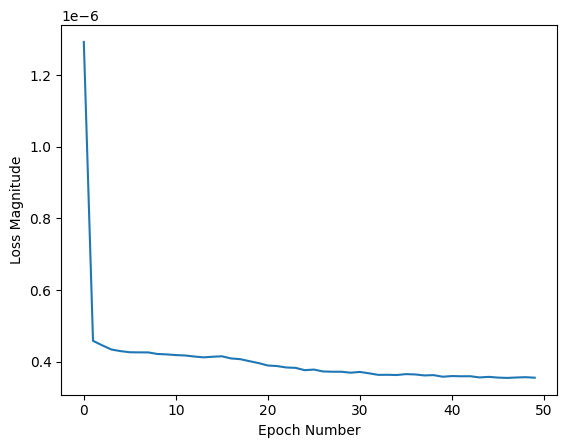

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(history.history["loss"])


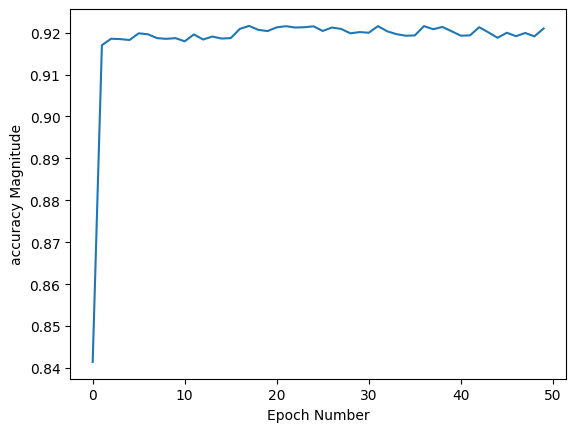

In [ ]:
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.plot(history.history["accuracy"])

In [ ]:
eval = model.evaluate(xtest_set, ytest_set)

532/532 [==============================] - 1s 2ms/step - loss: 4.0792e-06 - accuracy: 0.8931


In [ ]:
y = model.predict(xtest_set)

532/532 [==============================] - 2s 3ms/step


In [ ]:
y.shape

(17000, 3)

In [ ]:
y[1]

array([-0.00519281, -0.00634611, -0.01045821], dtype=float32)

In [ ]:
ytest_set[1]

array([-0.00581984, -0.0050215 , -0.00890171])

In [ ]:
import tensorflow as tf
import numpy as np
model = tf.keras.models.load_model('invkine.h5', compile = False)

In [ ]:
test = np.array([[0.451380884738815, 0.371668536050996, 0.104508618960214, 0.881155732270505, 0.441557601518660, 0.520551457806297]])
pred = model.predict(xtest_set)

532/532 [==============================] - 1s 2ms/step
